In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import xgboost
from sklearn.metrics import accuracy_score, classification_report
import pickle

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
df = pd.read_csv('train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             1995 non-null   float64
 5   four_g         1995 non-null   float64
 6   int_memory     1995 non-null   float64
 7   m_dep          1995 non-null   float64
 8   mobile_wt      1996 non-null   float64
 9   n_cores        1996 non-null   float64
 10  pc             1995 non-null   float64
 11  px_height      1996 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1999 non-null   float64
 15  sc_w           1999 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,1995.000000,1995.000000,1995.000000,1995.000000,1996.000000,1996.000000,...,1996.000000,1998.000000,1998.000000,1999.000000,1999.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.310276,0.521303,32.048120,0.502256,140.266533,4.518036,...,644.651804,1251.287788,2124.262262,12.303652,5.766383,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.335766,0.499671,18.146476,0.288530,35.384676,2.288946,...,443.355443,432.352930,1085.273372,4.212373,4.357400,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.000000,874.250000,1206.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2147.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3065.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
# check duplicate samples
df[df.duplicated() == True]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [ ]:
# check for variations
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1135
px_width         1109
ram              1561
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

## EDA

In [ ]:
df['price_range'].value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

In [ ]:
df['battery_power'].value_counts()

battery_power
1872    6
618     6
1589    6
1715    5
1807    5
       ..
660     1
1452    1
1005    1
1372    1
858     1
Name: count, Length: 1094, dtype: int64

<Axes: xlabel='talk_time', ylabel='battery_power'>

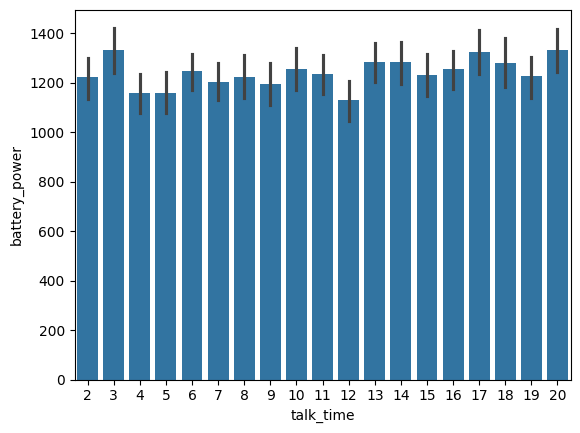

In [ ]:
sns.barplot(data = df, x ='talk_time', y = 'battery_power')

<Axes: xlabel='clock_speed', ylabel='battery_power'>

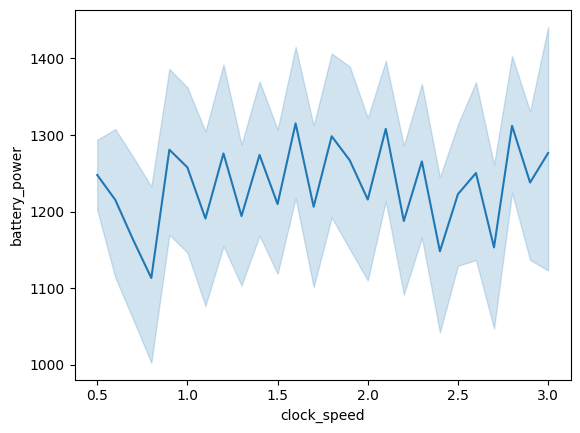

In [ ]:
sns.lineplot(data = df, x ='clock_speed', y = 'battery_power')

<Axes: xlabel='sc_h', ylabel='sc_w'>

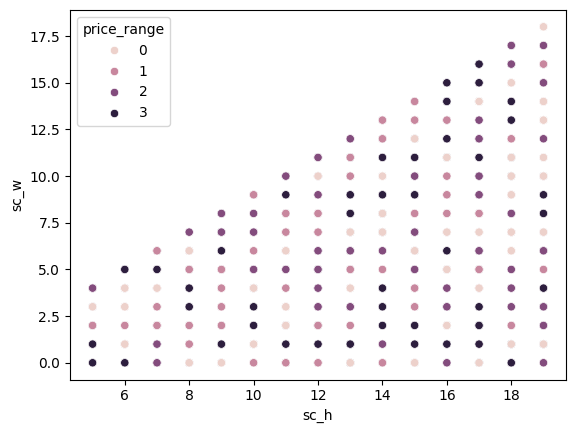

In [ ]:
# does the device price increase with the increase of its size?
sns.scatterplot(data = df, x = 'sc_h', y= 'sc_w', hue = 'price_range')

<Axes: xlabel='sc_h', ylabel='sc_w'>

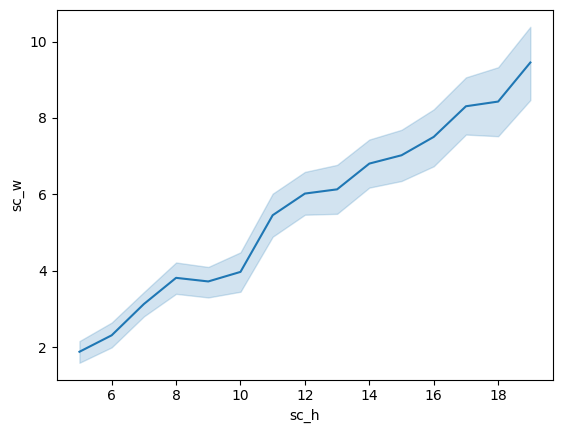

In [ ]:
sns.lineplot(data = df, x = 'sc_h', y= 'sc_w')

### Correlation between features

<Axes: >

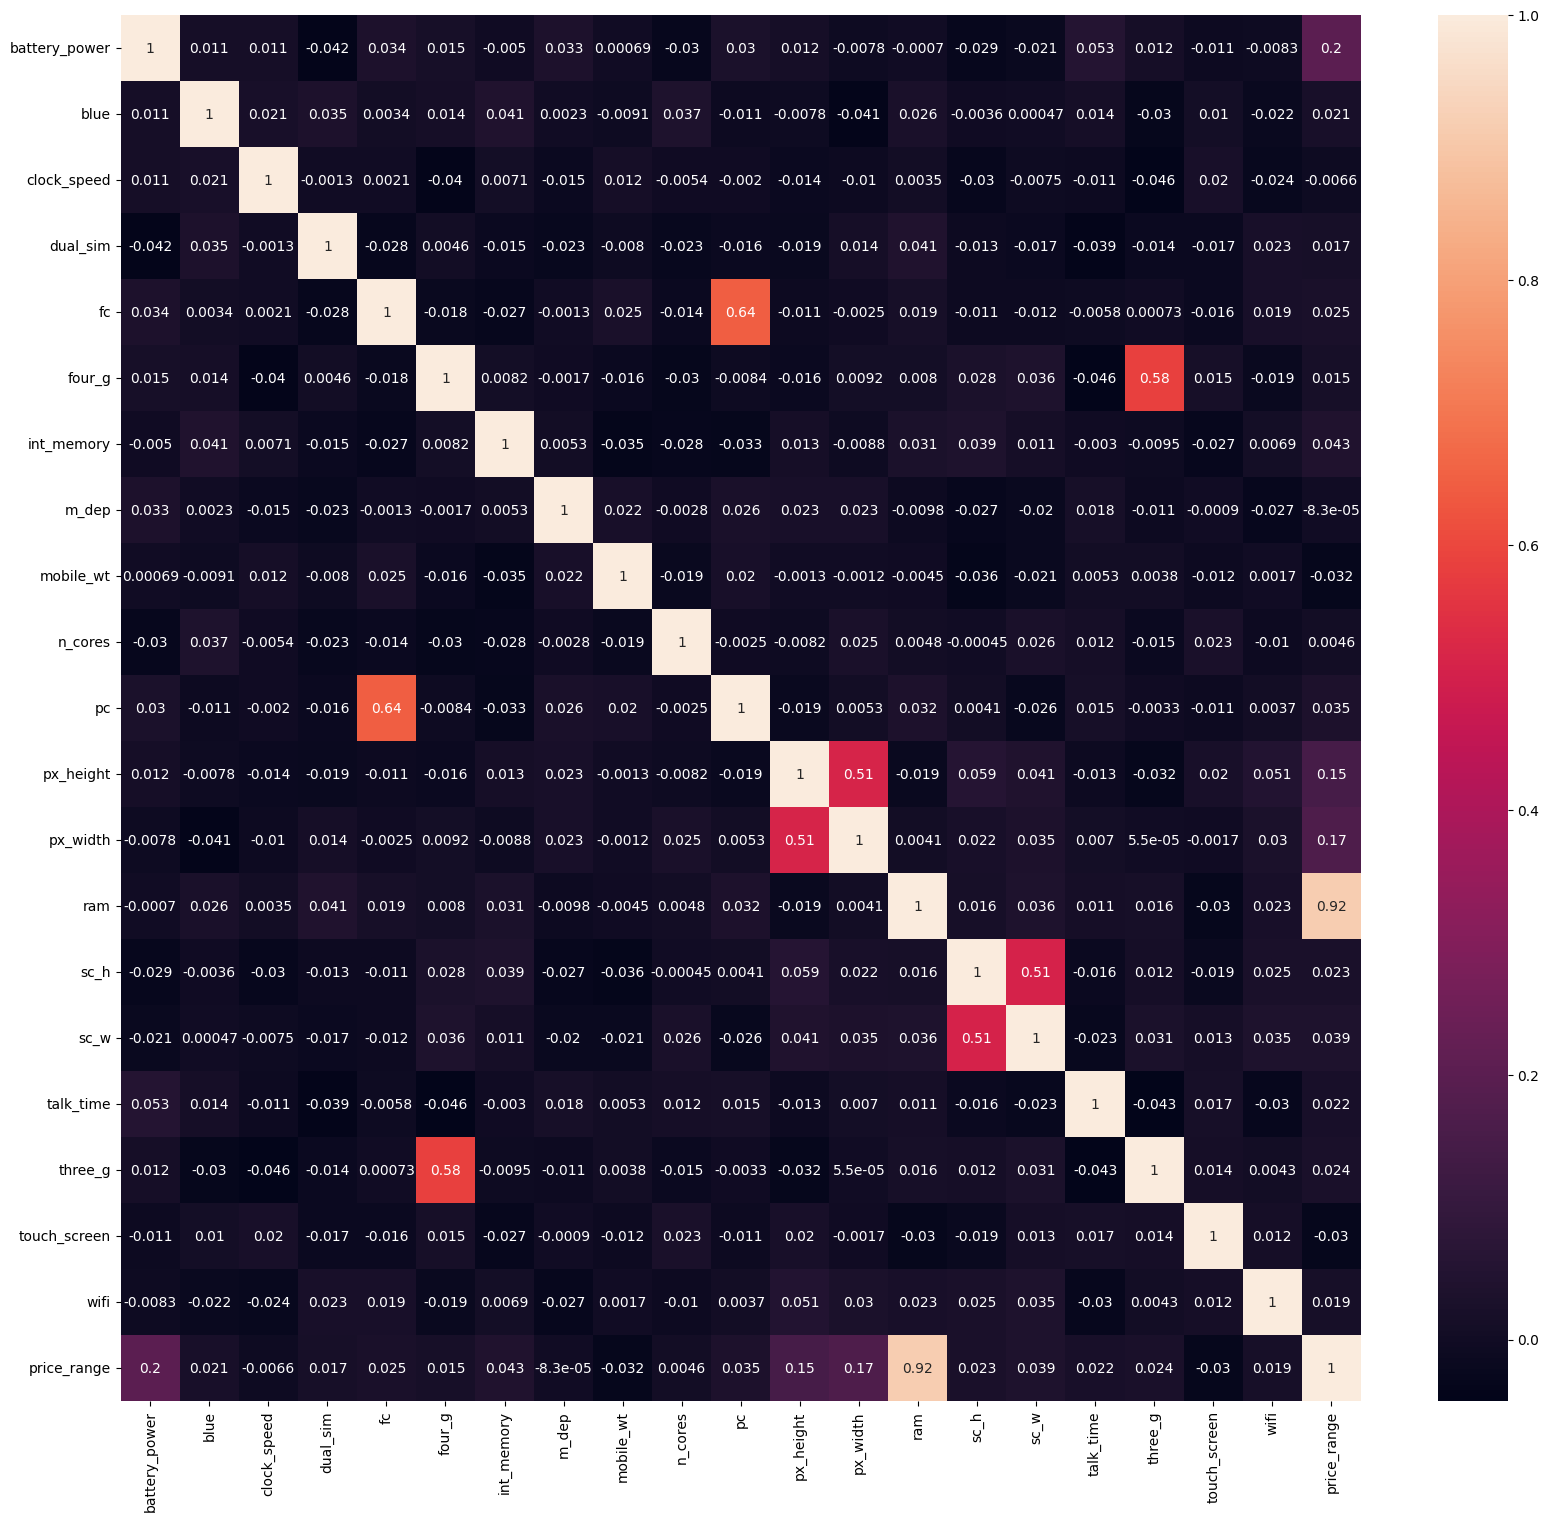

In [ ]:
fig = plt.figure(figsize = (20, 18))
sns.heatmap(df.corr(), annot = True, )

- there is a high correlation between **ram** and **price_range** more than 90%

#### Does the price of the device change as there is a change in the following features?

- these features are somehow correlated so they're worth investigating them and their effect on the target:
  - fc & pc
  - px_height & px_width
  - three_g & four_g


<Axes: xlabel='fc', ylabel='pc'>

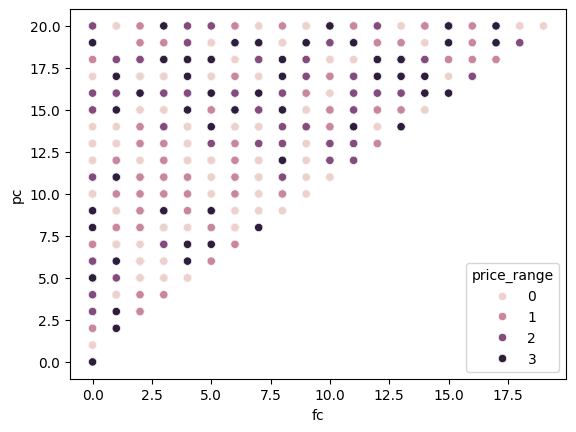

In [ ]:
sns.scatterplot(data= df, x = 'fc', y = 'pc', hue = 'price_range')

<Axes: xlabel='three_g', ylabel='Count'>

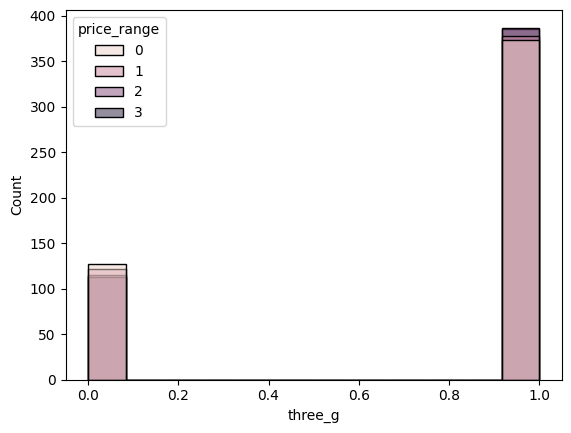

In [ ]:
sns.histplot(data = df, x = 'three_g', hue = 'price_range')

<Axes: xlabel='four_g', ylabel='Count'>

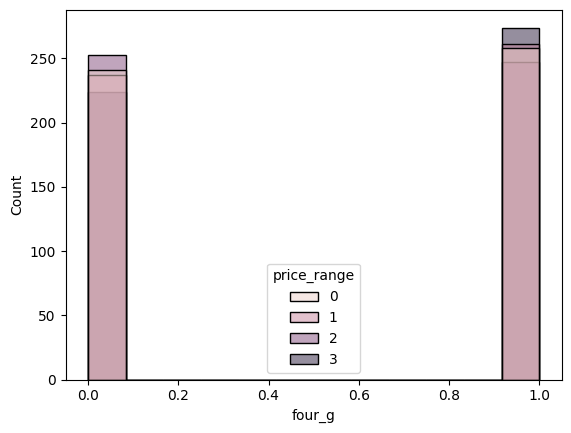

In [ ]:
sns.histplot(data = df, x = 'four_g', hue = 'price_range')

<Axes: xlabel='px_height', ylabel='px_width'>

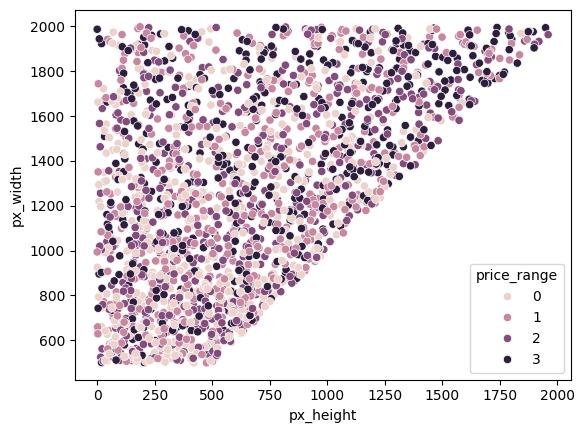

In [ ]:
# df['px_height']
# px_width
sns.scatterplot(data = df, x = 'px_height', y = 'px_width', hue = 'price_range')

## Preprocessing

In [ ]:
# create a copy of the original data
# drop rows with null values
df_copy = df.copy()
df_copy.dropna(axis = 0, inplace =True)

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1991 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1991 non-null   int64  
 1   blue           1991 non-null   int64  
 2   clock_speed    1991 non-null   float64
 3   dual_sim       1991 non-null   int64  
 4   fc             1991 non-null   float64
 5   four_g         1991 non-null   float64
 6   int_memory     1991 non-null   float64
 7   m_dep          1991 non-null   float64
 8   mobile_wt      1991 non-null   float64
 9   n_cores        1991 non-null   float64
 10  pc             1991 non-null   float64
 11  px_height      1991 non-null   float64
 12  px_width       1991 non-null   float64
 13  ram            1991 non-null   float64
 14  sc_h           1991 non-null   float64
 15  sc_w           1991 non-null   float64
 16  talk_time      1991 non-null   int64  
 17  three_g        1991 non-null   int64  
 18  touch_screen 

In [ ]:
# the features has different scales so standardization will be used
y = df_copy['price_range'].astype('int')
X = df_copy.drop('price_range', axis = 1)

scaler = StandardScaler()
normalized_data = scaler.fit_transform(X)

In [ ]:
scaler.get_feature_names_out()

array(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'], dtype=object)

In [ ]:
transformer_df = pd.DataFrame(normalized_data, columns = scaler.get_feature_names_out())
transformer_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.901577,-0.992494,0.831049,-1.021836,-0.762424,-1.042594,-1.382754,0.339599,1.348883,-1.098504,-1.305239,-1.410895,-1.146588,0.392123,-0.785347,0.281321,1.463987,-1.784033,-1.003522,0.989508
1,-0.494324,1.007562,-1.254089,0.978631,-0.992910,0.959146,1.153971,0.686160,-0.120463,-0.661953,-0.645118,0.587570,1.706476,0.467715,1.113987,-0.636892,-0.732407,0.560528,0.996490,-1.010604
2,-1.536345,1.007562,-1.254089,0.978631,-0.531937,0.959146,0.492216,1.379283,0.133847,0.211150,-0.645118,1.395989,1.076579,0.441903,-0.310514,-0.866445,-0.366342,0.560528,0.996490,-1.010604
3,-1.418037,1.007562,1.199014,-1.021836,-0.992910,-1.042594,-1.217315,1.032721,-0.261747,0.647701,-0.150027,1.289856,1.238685,0.594930,0.876570,0.510874,-0.000276,0.560528,-1.003522,-1.010604
4,1.325799,1.007562,-0.395503,-1.021836,2.003417,0.959146,0.657655,0.339599,0.020820,-1.098504,0.675124,1.271790,-0.090584,-0.656938,-1.022764,-0.866445,0.731856,0.560528,0.996490,-1.010604


In [ ]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1592, 20), (399, 20), (1592,), (399,))

## Training

### Baseline Model

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Evaluate LogisticRegression

In [ ]:
y_pred = lr.predict(X_test)
accuracy_score(y_test, y_pred)

0.6265664160401002

In [ ]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.81      0.75      0.78       106\n           1       0.48      0.53      0.51        89\n           2       0.53      0.49      0.50       107\n           3       0.68      0.73      0.71        97\n\n    accuracy                           0.63       399\n   macro avg       0.63      0.63      0.62       399\nweighted avg       0.63      0.63      0.63       399\n'

In [ ]:
# lr.save('logisticregression.pkl')
# pickle.dumps(lr)
import joblib


# Save the model as a pickle in a file
joblib.dump(lr, 'logisticRegression.pkl')

['logisticRegression.pkl']

### Train XGBoost

- as an ensemble model that works really well for structure data and based on my experience beat small models like LogisticRegression in most cases.

In [ ]:
xgb = xgboost.XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

#### Evaluate XGBoost

In [ ]:
xgb_y_pred = xgb.predict(X_test)
accuracy_score(y_test, xgb_y_pred)

0.9223057644110275

In [ ]:
classification_report(y_test, xgb_y_pred)

'              precision    recall  f1-score   support\n\n           0       0.96      0.94      0.95       106\n           1       0.86      0.92      0.89        89\n           2       0.94      0.86      0.90       107\n           3       0.92      0.97      0.94        97\n\n    accuracy                           0.92       399\n   macro avg       0.92      0.92      0.92       399\nweighted avg       0.92      0.92      0.92       399\n'

- it seems that XGBoost outperform the baseline model by more than 30%

In [ ]:
import joblib


# Save the model as a pickle in a file
joblib.dump(xgb, 'xgboost.pkl')

['xgboost.pkl']